In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("air_quality.csv")

# Basic info
print("Shape:", df.shape)
df.info()
df.head()



Shape: (3192, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3192 non-null   object 
 1   state          3192 non-null   object 
 2   city           3192 non-null   object 
 3   station        3192 non-null   object 
 4   last_update    3192 non-null   object 
 5   latitude       3192 non-null   float64
 6   longitude      3192 non-null   float64
 7   pollutant_id   3192 non-null   object 
 8   pollutant_min  2944 non-null   float64
 9   pollutant_max  2944 non-null   float64
 10  pollutant_avg  2944 non-null   float64
dtypes: float64(5), object(6)
memory usage: 274.4+ KB


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",01-10-2025 14:00:00,25.265194,87.012947,NH3,6.0,10.0,7.0
1,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",01-10-2025 14:00:00,25.265194,87.012947,CO,46.0,74.0,53.0
2,India,Bihar,Bihar Sharif,"D M Colony, Bihar Sharif - BSPCB",01-10-2025 14:00:00,25.204762,85.514960,PM10,58.0,71.0,66.0
3,India,Bihar,Bihar Sharif,"D M Colony, Bihar Sharif - BSPCB",01-10-2025 14:00:00,25.204762,85.514960,SO2,10.0,10.0,10.0
4,India,Bihar,Buxar,"Charitra Van, Buxar - BSPCB",01-10-2025 14:00:00,25.567520,83.966379,CO,20.0,30.0,25.0


In [2]:
# Convert timestamp to datetime
df['last_update'] = pd.to_datetime(df['last_update'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

# Drop rows with missing pollutant_avg (core measure)
df = df.dropna(subset=['pollutant_avg'])

# Strip whitespace from object columns
df.columns = df.columns.str.strip()
for col in df.select_dtypes('object'):
    df[col] = df[col].str.strip()

print("Cleaned Data Shape:", df.shape)


Cleaned Data Shape: (2944, 11)


In [3]:
# Descriptive stats
print(df[['pollutant_min','pollutant_max','pollutant_avg']].describe())

# Unique pollutants
print("Unique Pollutants:", df['pollutant_id'].unique())

# Count by pollutant
pollutant_counts = df['pollutant_id'].value_counts()
print(pollutant_counts)


       pollutant_min  pollutant_max  pollutant_avg
count    2944.000000    2944.000000    2944.000000
mean       15.691916      48.612092      27.974185
std        15.025469      54.591900      26.003751
min         1.000000       1.000000       1.000000
25%         4.000000      13.000000       9.000000
50%        11.000000      34.000000      21.000000
75%        23.000000      64.000000      40.000000
max       111.000000     500.000000     289.000000
Unique Pollutants: ['NH3' 'CO' 'PM10' 'SO2' 'PM2.5' 'NO2' 'OZONE']
pollutant_id
CO       442
OZONE    437
NO2      431
PM10     425
PM2.5    418
SO2      411
NH3      380
Name: count, dtype: int64


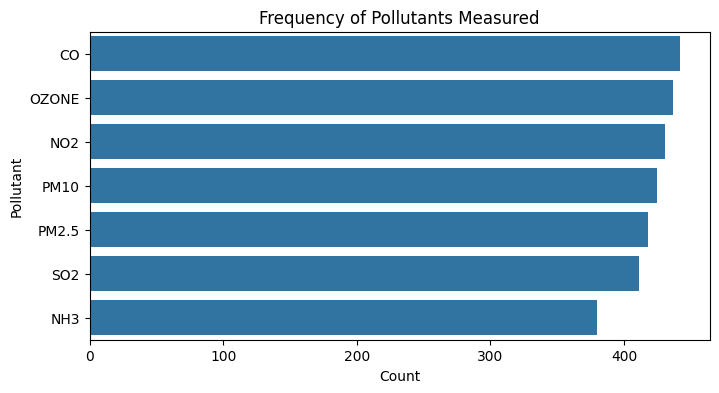

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(y='pollutant_id', data=df, order=df['pollutant_id'].value_counts().index)
plt.title("Frequency of Pollutants Measured")
plt.xlabel("Count")
plt.ylabel("Pollutant")
plt.show()
plt.savefig('Pollutant_count.jpg')


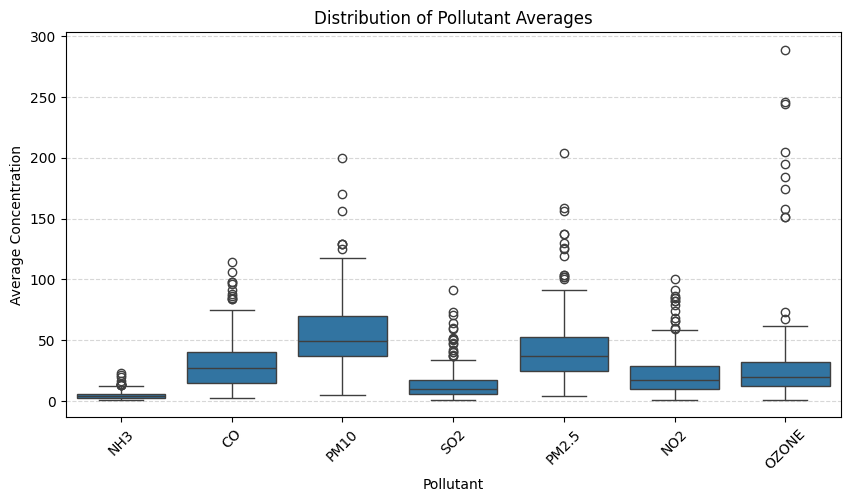

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pollutant_id', y='pollutant_avg', data=df)
plt.title("Distribution of Pollutant Averages")
plt.xlabel("Pollutant")
plt.ylabel("Average Concentration")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()
plt.savefig('pollutant_avg_boxplot.png')


/tmp/ipython-input-3462469766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.values, y=city_avg.index, palette='Reds_r')


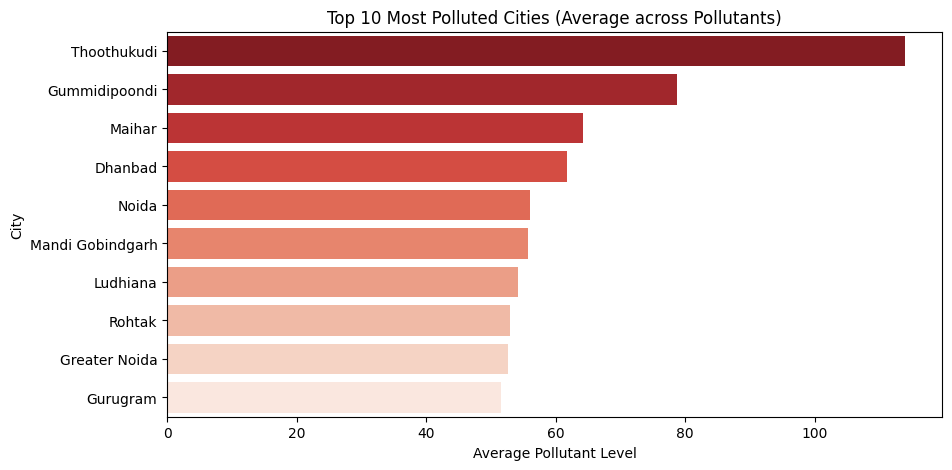

<Figure size 640x480 with 0 Axes>

In [6]:
city_avg = df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city_avg.values, y=city_avg.index, palette='Reds_r')
plt.title("Top 10 Most Polluted Cities (Average across Pollutants)")
plt.xlabel("Average Pollutant Level")
plt.ylabel("City")
plt.show()
plt.savefig('top10_cities.png')


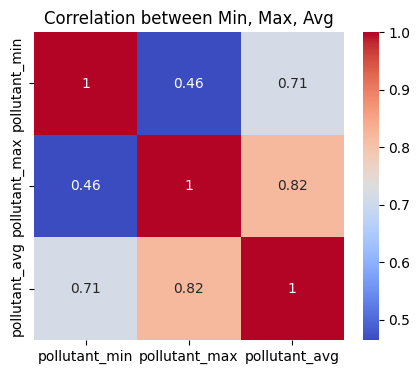

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['pollutant_min','pollutant_max','pollutant_avg']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Min, Max, Avg")
plt.show()
plt.savefig('correlation_heatmap.png')


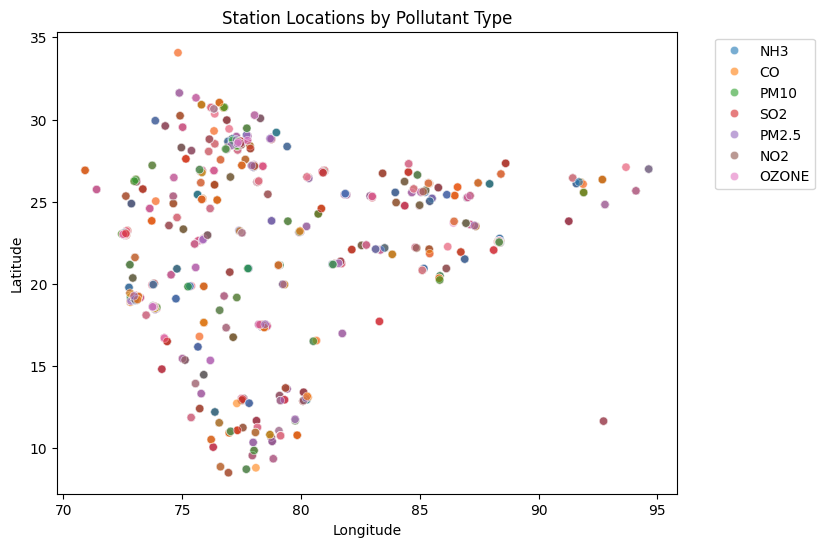

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='pollutant_id', alpha=0.6)
plt.title("Station Locations by Pollutant Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.savefig('station_locations.png')
